# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Alan Yael ALmmaraz Parra |
| **Fecha**      |29/01/2026|
| **Expediente** |751171|

## Regresión polinomial

Observa la siguiente gráfica.

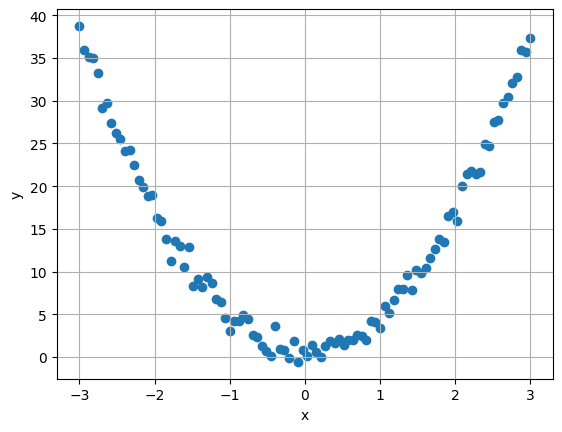

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [2]:
from sklearn.linear_model import LinearRegression
x = x.reshape((-1, 1))
lr = LinearRegression()
lr.fit(x, y)

beta_0 = lr.intercept_
beta_1 = lr.coef_[0]
print(f"Beta 0: {beta_0:.4f}")
print(f"Beta 1: {beta_1:.4f}")

Beta 0: 13.3022
Beta 1: -0.0496


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

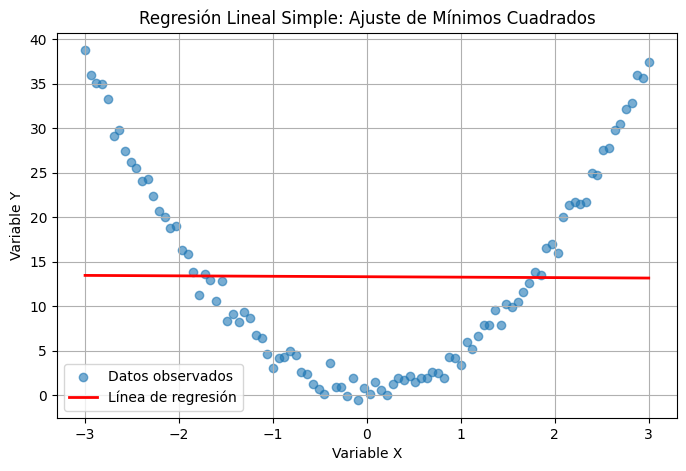

In [3]:
y_pred = lr.predict(x)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Datos observados", alpha=0.6)
plt.plot(x, y_pred, color="red", linewidth=2, label="Línea de regresión")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.title("Regresión Lineal Simple: Ajuste de Mínimos Cuadrados")
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [23]:
X = np.hstack([x, x**2])
lr_p = LinearRegression()
lr_p.fit(X, y)
r2 = lr_p.score(X, y)
print(f"Coeficientes del modelo polinómico: {lr_p.coef_}")
print(f"Intercepto del modelo polinómico: {lr_p.intercept_}")
print(f"El valor de R2 del modelo polinómico es: {r2:.4f}")

Coeficientes del modelo polinómico: [-0.04955448  4.14388884]
Intercepto del modelo polinómico: 0.6194209631804899
El valor de R2 del modelo polinómico es: 0.9934


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

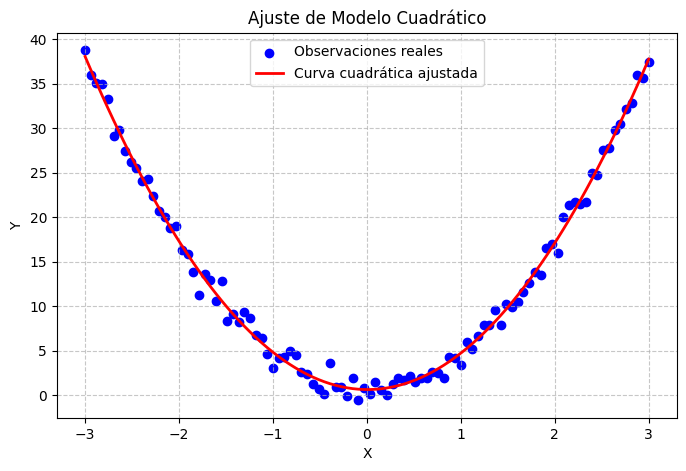

In [ ]:

y_p = lr_p.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Observaciones reales')
plt.plot(x, y_p, color='red', linewidth=2, label='Curva cuadrática ajustada')
plt.title('Ajuste de Modelo Cuadrático')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [90]:
grados = [2, 3, 5, 7, 9, 11]
m = {}

for g in grados:
    X_1 = np.column_stack([x**i for i in range(1, g + 1)])
    
    lr_1 = LinearRegression().fit(X_1, y)
    
    # Calculamos R^2
    r2_polinomio = lr_1.score(X_1, y)
    m[g] = lr_1
    print(f"Modelo hasta x^{g}: R2 = {r2_polinomio:.6f}")

Modelo hasta x^2: R2 = 0.993412
Modelo hasta x^3: R2 = 0.993413
Modelo hasta x^5: R2 = 0.993495
Modelo hasta x^7: R2 = 0.993509
Modelo hasta x^9: R2 = 0.993514
Modelo hasta x^11: R2 = 0.993534


Crea una gráfica por cada modelo con las observaciones y su curva.

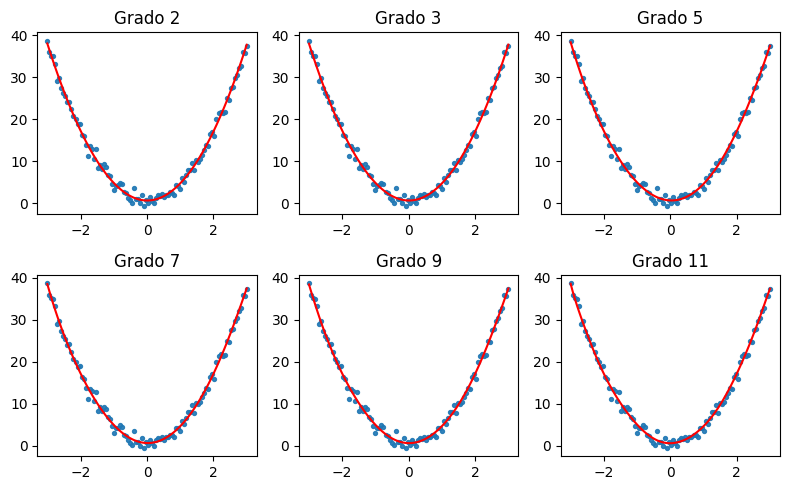

In [91]:
plt.figure(figsize=(8, 5))
for i, g in enumerate(grados):
    plt.subplot(2, 3, i+1)
    
    X__m = np.column_stack([x**j for j in range(1, g + 1)])
    y__m = m[g].predict(X__m)
    
    plt.scatter(x, y, alpha=.9, s=8)
    plt.plot(x, y__m, color='red')
    plt.title(f"Grado {g}")
    plt.grid(False)

plt.tight_layout()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El mejor modelo es el que contiene hasta x^11 porque es el más cercano a 1

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [92]:
var_x = 5

for g in grados:
    input_x = np.array([var_x**i for i in range(1, g + 1)])
    input_x = input_x.reshape(1, -1)
    predict = m[g].predict(input_x)
    print(f"Modelo Grado {g:2d}: y_predicción = {predict[0]:.3f}")

Modelo Grado  2: y_predicción = 103.969
Modelo Grado  3: y_predicción = 104.252
Modelo Grado  5: y_predicción = 84.599
Modelo Grado  7: y_predicción = 33.743
Modelo Grado  9: y_predicción = 215.736
Modelo Grado 11: y_predicción = -5265.344


¿Cuál modelo crees que sea mejor?

El modelo de grado 11 en cuestión de R2 es el mejor, porque es el que está mejor entrenado para la muestra que tenemos y a datos que ya conocemos, es bueno porque se adapta y trata de pasar por cada punto ya esctruturado de la muestra, esto es lo que le causa mucha dificultad al momento de predecir. Siguiendo esta misma lógica el mejor modelo para predecir es el de **grado 2**, este modelo tiene un excelente R2 y mantiene una buena generalización de los datos 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3